In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

main_gdp = pd.read_csv('main_gdp.csv', index_col=['Country Name', 'Country Code'])
main_government = pd.read_csv('main_government.csv', index_col=['Country Name', 'Country Code'])
main_investments = pd.read_csv('main_investments.csv', index_col=['Country Name', 'Country Code'])
main_consumption = pd.read_csv('main_consumption.csv', index_col=['Country Name', 'Country Code'])
main_trade = pd.read_csv('main_trade.csv', index_col=['Country Name', 'Country Code'])

(main_gdp.head(), main_government.head(), main_investments.head(), main_consumption.head(), main_trade.head())

(                                              1960      1961      1962  \
 Country Name                Country Code                                 
 Aruba                       ABW          -0.201874 -0.200982 -0.200327   
 Africa Eastern and Southern AFE          -0.094914 -0.098259 -0.094392   
 Afghanistan                 AFG          -0.201874 -0.200982 -0.200327   
 Africa Western and Central  AFW          -0.135881 -0.136426 -0.136892   
 Angola                      AGO          -0.201874 -0.200982 -0.200327   
 
                                               1963      1964      1965  \
 Country Name                Country Code                                 
 Aruba                       ABW          -0.199863 -0.200426 -0.202832   
 Africa Eastern and Southern AFE          -0.094446 -0.097204 -0.095992   
 Afghanistan                 AFG          -0.199863 -0.200426 -0.202832   
 Africa Western and Central  AFW          -0.135198 -0.136542 -0.136252   
 Angola                

#### Unir mediante sufijos especificados

In [2]:
# Unir los DataFrames uno por uno
df_combined = main_gdp.join(main_government, lsuffix='_gdp', rsuffix='_gov')
df_combined = df_combined.join(main_investments, rsuffix='_inv')
df_combined = df_combined.join(main_consumption, rsuffix='_con')
df_combined = df_combined.join(main_trade, rsuffix='_trade')

# Corregir la fórmula para calcular el GDP correctamente usando los sufijos adecuados para cada año
for year in range(1960, 2023):
    gdp_col = f'{year}_gdp' if f'{year}_gdp' in df_combined.columns else str(year)
    gov_col = f'{year}_gov' if f'{year}_gov' in df_combined.columns else str(year)
    inv_col = f'{year}_inv' if f'{year}_inv' in df_combined.columns else str(year)
    con_col = f'{year}_con' if f'{year}_con' in df_combined.columns else str(year)
    trade_col = f'{year}_trade' if f'{year}_trade' in df_combined.columns else str(year)

    df_combined[f'GDP_calculated_{year}'] = (df_combined[gdp_col] +
                                             df_combined[gov_col] +
                                             df_combined[inv_col] +
                                             df_combined[con_col] +
                                             df_combined[trade_col])

# Mostrar las primeras filas del DataFrame combinado para confirmar que los cálculos están correctos
df_combined[[f'GDP_calculated_{year}' for year in range(1960, 2023)]].head()

,,GDP_calculated_1960,GDP_calculated_1961,GDP_calculated_1962,GDP_calculated_1963,GDP_calculated_1964,GDP_calculated_1965,GDP_calculated_1966,GDP_calculated_1967,GDP_calculated_1968,GDP_calculated_1969,...,GDP_calculated_2013,GDP_calculated_2014,GDP_calculated_2015,GDP_calculated_2016,GDP_calculated_2017,GDP_calculated_2018,GDP_calculated_2019,GDP_calculated_2020,GDP_calculated_2021,GDP_calculated_2022
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,-0.687051,-0.688787,-0.705721,-0.732952,-0.740670,-0.789346,-0.816753,-0.805947,-0.813468,-0.821448,...,-1.017331,-1.023442,-1.046426,-0.965575,-0.972609,-1.011146,-1.006774,-0.976539,-0.925748,-0.925497
Africa Eastern and Southern,AFE,1.964340,1.768977,2.534770,2.382340,2.319873,2.892425,4.186396,3.520173,3.487117,4.356643,...,-0.770508,-0.786264,-0.840639,-0.740249,-0.747085,-0.788861,-0.786684,-0.756719,-0.599803,-0.593651
Afghanistan,AFG,-0.687051,-0.688787,-0.705721,-0.732952,-0.740670,-0.789346,-0.816753,-0.805947,-0.813468,-0.821448,...,-1.015306,-1.021407,-1.044415,-0.963573,-0.970639,-1.009221,-1.004804,-0.972484,-0.923705,-0.918717
Africa Western and Central,AFW,-0.621058,-0.624231,-0.642287,-0.668287,-0.676786,-0.722767,-0.755287,-0.753854,-0.419140,-0.286099,...,-0.264882,-0.453932,-0.876033,-0.872786,-0.756485,-0.585735,-0.685331,-0.871547,-0.834270,-0.833380
Angola,AGO,-0.687051,-0.646070,-0.672906,-0.698693,-0.677888,-0.782412,-0.789625,-0.805947,-0.813468,-0.821448,...,-0.465233,-0.657339,-0.932675,-0.812782,-0.736018,-0.664243,-0.802329,-0.931221,-0.917089,-0.923103


In [3]:
df_combined.describe(), df_combined.info(), df_combined.shape, df_combined.columns, df_combined.index, df_combined.dtypes, df_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 239 entries, ('Aruba', 'ABW') to ('Zimbabwe', 'ZWE')
Columns: 376 entries, 1960_gdp to GDP_calculated_2022
dtypes: float64(376)
memory usage: 731.2+ KB


(         1960_gdp    1961_gdp    1962_gdp    1963_gdp    1964_gdp    1965_gdp  \
 count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
 mean    -0.081045   -0.080586   -0.079957   -0.079715   -0.080026   -0.081028   
 std      0.811894    0.811040    0.811016    0.810860    0.810938    0.811302   
 min     -0.224510   -0.223332   -0.222338   -0.222336   -0.222801   -0.221246   
 25%     -0.202029   -0.205308   -0.204461   -0.204545   -0.204212   -0.207263   
 50%     -0.201874   -0.200982   -0.200327   -0.199863   -0.200426   -0.202832   
 75%     -0.201874   -0.200982   -0.200327   -0.199863   -0.200426   -0.202832   
 max      8.925325    8.916576    8.903261    8.903658    8.909846    8.905935   
 
          1966_gdp    1967_gdp    1968_gdp    1969_gdp  ...  \
 count  239.000000  239.000000  239.000000  239.000000  ...   
 mean    -0.080735   -0.080437   -0.081089   -0.082057  ...   
 std      0.811470    0.810851    0.810718    0.810380  ...   
 min    

# WORLD   |   COUNTRIES

### World

In [4]:
df_world = df_combined.loc['World']
df_world

,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,1966_gdp,1967_gdp,1968_gdp,1969_gdp,...,GDP_calculated_2013,GDP_calculated_2014,GDP_calculated_2015,GDP_calculated_2016,GDP_calculated_2017,GDP_calculated_2018,GDP_calculated_2019,GDP_calculated_2020,GDP_calculated_2021,GDP_calculated_2022
Country Code,,,,,,,,,,,,,,,,,,,,,
WLD,8.925325,8.916576,8.903261,8.903658,8.909846,8.905935,8.893228,8.892912,8.894431,8.920468,...,19.945839,19.911398,17.391711,19.909714,19.897277,19.865401,19.844482,19.80143,31.407289,31.527472


### Countries

In [5]:
# Excluir filas que pertenecen a regiones y al mundo

lista_regiones = [
    "Africa Eastern and Southern", "Africa Western and Central", "Central Europe and the Baltics",
    "East Asia & Pacific", "Europe & Central Asia", "European Union", "Latin America & Caribbean",
    "Middle East & North Africa", "North America", "OECD members", "Sub-Saharan Africa (excluding high income)",
    "South Asia (IDA & IBRD)"
]
country_mask = (~df_combined.index.get_level_values('Country Name').isin(lista_regiones + ['World']))
df_countries = df_combined[country_mask]
df_countries

,,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,1966_gdp,1967_gdp,1968_gdp,1969_gdp,...,GDP_calculated_2013,GDP_calculated_2014,GDP_calculated_2015,GDP_calculated_2016,GDP_calculated_2017,GDP_calculated_2018,GDP_calculated_2019,GDP_calculated_2020,GDP_calculated_2021,GDP_calculated_2022
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.017331,-1.023442,-1.046426,-0.965575,-0.972609,-1.011146,-1.006774,-0.976539,-0.925748,-0.925497
Afghanistan,AFG,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.015306,-1.021407,-1.044415,-0.963573,-0.970639,-1.009221,-1.004804,-0.972484,-0.923705,-0.918717
Angola,AGO,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-0.465233,-0.657339,-0.932675,-0.812782,-0.736018,-0.664243,-0.802329,-0.931221,-0.917089,-0.923103
Albania,ALB,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.024486,-1.030680,-1.050654,-0.972267,-0.979659,-1.018762,-1.015177,-0.984239,-0.946538,-0.954034
Andorra,AND,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.017377,-1.023472,-1.046447,-0.965590,-0.972647,-1.011185,-1.006798,-0.976514,-0.925774,-0.925529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.028729,-1.034928,-1.054572,-0.976205,-0.983589,-1.022714,-1.019152,-0.988298,-0.951340,-0.959118
"Yemen, Rep.",YEM,-0.201874,-0.200982,-0.200327,-0.199863,-0.200426,-0.202832,-0.202705,-0.202662,-0.203255,-0.204786,...,-1.018770,-1.025404,-1.049979,-0.972641,-0.980441,-1.018888,-1.000565,-0.970490,-0.919628,-0.918717
South Africa,ZAF,-0.169603,-0.168437,-0.167114,-0.165969,-0.165662,-0.163839,-0.163451,-0.160740,-0.162603,-0.164274,...,-0.933638,-0.942189,-0.971863,-0.888590,-0.883052,-0.940374,-0.938708,-0.791299,-0.852809,-0.859582


### Regions (De referencia, no se aplicará)

In [6]:
# Archivo Codes es un metadata sobre códigos de paises.
codes = pd.read_excel('Codes.xlsx')

# Crear un mapeo de 'Country Code' a 'Region' usando solo las entradas en 'lista_regiones'
filtered_codes = codes[codes['Region'].isin(lista_regiones)]
country_to_region = filtered_codes.set_index('Country Code')['Region']

# Aplicar este mapeo al DataFrame 'df_combined'
df_combined['Region'] = df_combined.index.get_level_values('Country Code').map(country_to_region)

# Filtrar el DataFrame para incluir solo filas donde la 'Region' esté definida
df_regions = df_combined.dropna(subset=['Region'])

# Agrupar por 'Region' y sumar los valores para cada columna
df_regions = df_regions.groupby('Region').sum()

df_regions.head()

,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,1966_gdp,1967_gdp,1968_gdp,1969_gdp,...,GDP_calculated_2013,GDP_calculated_2014,GDP_calculated_2015,GDP_calculated_2016,GDP_calculated_2017,GDP_calculated_2018,GDP_calculated_2019,GDP_calculated_2020,GDP_calculated_2021,GDP_calculated_2022
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,-6.824558,-6.801649,-6.773692,-6.739758,-6.723409,-6.765620,-6.720207,-6.669891,-6.659509,-6.649542,...,-3.674142,-2.358834,0.121531,1.459465,1.690320,0.226357,2.495186,3.851648,-0.500491,-0.310485
Europe & Central Asia,-9.691664,-9.603688,-9.578843,-9.550707,-9.599877,-9.727407,-9.740002,-9.710470,-9.759768,-9.842725,...,-41.788147,-43.454942,-49.563682,-43.578853,-42.284450,-43.163723,-44.222898,-45.346960,-46.765078,-46.937925
Latin America & Caribbean,-8.464656,-8.408003,-8.379139,-8.387486,-8.404706,-8.423448,-8.409930,-8.381006,-8.407552,-8.457507,...,-38.686483,-38.834487,-40.279676,-36.497662,-36.286598,-37.868593,-37.789479,-36.552207,-34.779918,-34.828626
Middle East & North Africa,-4.249103,-4.229591,-4.217366,-4.204654,-4.214414,-4.276927,-4.277744,-4.264914,-4.259781,-4.281930,...,16.659887,14.186188,9.040055,10.892649,11.531911,12.373879,10.400159,8.780381,9.038083,8.685722
North America,2.438380,2.396244,2.418113,2.396826,2.377447,2.403834,2.425244,2.381201,2.347475,2.280019,...,1.929953,1.933112,1.327117,2.066289,2.023086,1.927699,1.933361,2.090802,4.829924,4.690498


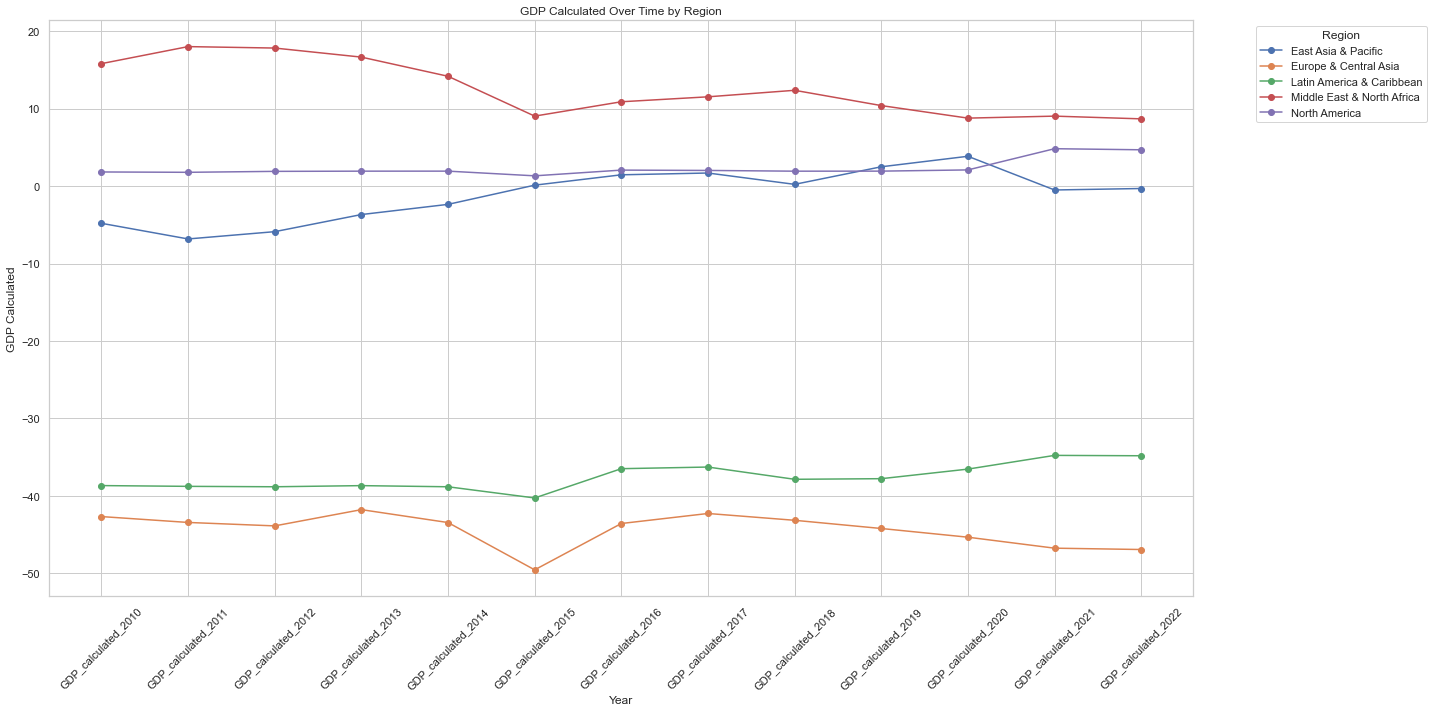

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar Estilo de Seaborn
sns.set(style="whitegrid")

# Seleccionar un subconjunto de columnas para la visualización por simplicidad
columns_to_plot = [f'GDP_calculated_{year}' for year in range(2010, 2023)]

# Crear un DataFrame para la visualización
df_plot = df_regions[columns_to_plot].transpose()

plt.figure(figsize=(20, 10))
for column in df_plot.columns:
    plt.plot(df_plot.index, df_plot[column], marker='o', label=column)

plt.title('GDP Calculated Over Time by Region')
plt.xlabel('Year')
plt.ylabel('GDP Calculated')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Por alguna razón, después de tantos errores, descubro que al crear 'Regions' se crean **NaN**, por lo que no trabajaré con éste DataFrame.

## Guardar los DataFrames como CSV

In [8]:
# Detalles de las columnas
df_world.columns.values[:376]
df_countries.columns.values[:376]

array(['1960_gdp', '1961_gdp', '1962_gdp', '1963_gdp', '1964_gdp',
       '1965_gdp', '1966_gdp', '1967_gdp', '1968_gdp', '1969_gdp',
       '1970_gdp', '1971_gdp', '1972_gdp', '1973_gdp', '1974_gdp',
       '1975_gdp', '1976_gdp', '1977_gdp', '1978_gdp', '1979_gdp',
       '1980_gdp', '1981_gdp', '1982_gdp', '1983_gdp', '1984_gdp',
       '1985_gdp', '1986_gdp', '1987_gdp', '1988_gdp', '1989_gdp',
       '1990_gdp', '1991_gdp', '1992_gdp', '1993_gdp', '1994_gdp',
       '1995_gdp', '1996_gdp', '1997_gdp', '1998_gdp', '1999_gdp',
       '2000_gdp', '2001_gdp', '2002_gdp', '2003_gdp', '2004_gdp',
       '2005_gdp', '2006_gdp', '2007_gdp', '2008_gdp', '2009_gdp',
       '2010_gdp', '2011_gdp', '2012_gdp', '2013_gdp', '2014_gdp',
       '2015_gdp', '2016_gdp', '2017_gdp', '2018_gdp', '2019_gdp',
       '2020_gdp', '2021_gdp', '2022_gdp', '1960_gov', '1961_gov',
       '1962_gov', '1963_gov', '1964_gov', '1965_gov', '1966_gov',
       '1967_gov', '1968_gov', '1969_gov', '1970_gov', '1971_g

In [9]:
# Guardar el DataFrame como CSV
df_world.to_csv('df_world.csv')
df_countries.to_csv('df_countries.csv')

### Diagnósticos

In [10]:
df_world.describe(), df_countries.describe()

(       1960_gdp  1961_gdp  1962_gdp  1963_gdp  1964_gdp  1965_gdp  1966_gdp  \
 count  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 mean   8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 std         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 min    8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 25%    8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 50%    8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 75%    8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 max    8.925325  8.916576  8.903261  8.903658  8.909846  8.905935  8.893228   
 
        1967_gdp  1968_gdp  1969_gdp  ...  GDP_calculated_2013  \
 count  1.000000  1.000000  1.000000  ...             1.000000   
 mean   8.892912  8.894431  8.920468  ...            19.945839   
 std         NaN       NaN       NaN  ...                  NaN   
 min    8.8929

In [11]:
df_world.isnull().sum().sum(), df_countries.isnull().sum().sum()

(0, 0)

In [12]:
df_world.dtypes, df_countries.dtypes

(1960_gdp               float64
 1961_gdp               float64
 1962_gdp               float64
 1963_gdp               float64
 1964_gdp               float64
                         ...   
 GDP_calculated_2018    float64
 GDP_calculated_2019    float64
 GDP_calculated_2020    float64
 GDP_calculated_2021    float64
 GDP_calculated_2022    float64
 Length: 376, dtype: object,
 1960_gdp               float64
 1961_gdp               float64
 1962_gdp               float64
 1963_gdp               float64
 1964_gdp               float64
                         ...   
 GDP_calculated_2018    float64
 GDP_calculated_2019    float64
 GDP_calculated_2020    float64
 GDP_calculated_2021    float64
 GDP_calculated_2022    float64
 Length: 376, dtype: object)

In [13]:
df_world.shape, df_countries.shape

((1, 376), (226, 376))

In [14]:
df_world.columns, df_countries.columns

(Index(['1960_gdp', '1961_gdp', '1962_gdp', '1963_gdp', '1964_gdp', '1965_gdp',
        '1966_gdp', '1967_gdp', '1968_gdp', '1969_gdp',
        ...
        'GDP_calculated_2013', 'GDP_calculated_2014', 'GDP_calculated_2015',
        'GDP_calculated_2016', 'GDP_calculated_2017', 'GDP_calculated_2018',
        'GDP_calculated_2019', 'GDP_calculated_2020', 'GDP_calculated_2021',
        'GDP_calculated_2022'],
       dtype='object', length=376),
 Index(['1960_gdp', '1961_gdp', '1962_gdp', '1963_gdp', '1964_gdp', '1965_gdp',
        '1966_gdp', '1967_gdp', '1968_gdp', '1969_gdp',
        ...
        'GDP_calculated_2013', 'GDP_calculated_2014', 'GDP_calculated_2015',
        'GDP_calculated_2016', 'GDP_calculated_2017', 'GDP_calculated_2018',
        'GDP_calculated_2019', 'GDP_calculated_2020', 'GDP_calculated_2021',
        'GDP_calculated_2022'],
       dtype='object', length=376))

In [15]:
df_world.index, df_countries.index

(Index(['WLD'], dtype='object', name='Country Code'),
 MultiIndex([(                 'Aruba', 'ABW'),
             (           'Afghanistan', 'AFG'),
             (                'Angola', 'AGO'),
             (               'Albania', 'ALB'),
             (               'Andorra', 'AND'),
             (            'Arab World', 'ARB'),
             (  'United Arab Emirates', 'ARE'),
             (             'Argentina', 'ARG'),
             (               'Armenia', 'ARM'),
             (        'American Samoa', 'ASM'),
             ...
             ('British Virgin Islands', 'VGB'),
             ( 'Virgin Islands (U.S.)', 'VIR'),
             (              'Viet Nam', 'VNM'),
             (               'Vanuatu', 'VUT'),
             (                 'Samoa', 'WSM'),
             (                'Kosovo', 'XKX'),
             (           'Yemen, Rep.', 'YEM'),
             (          'South Africa', 'ZAF'),
             (                'Zambia', 'ZMB'),
             (   

In [16]:
df_world.info(), df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, WLD to WLD
Columns: 376 entries, 1960_gdp to GDP_calculated_2022
dtypes: float64(376)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 226 entries, ('Aruba', 'ABW') to ('Zimbabwe', 'ZWE')
Columns: 376 entries, 1960_gdp to GDP_calculated_2022
dtypes: float64(376)
memory usage: 684.8+ KB


(None, None)

## Pasos Claves Faltantes




#### Verificación de Outliers

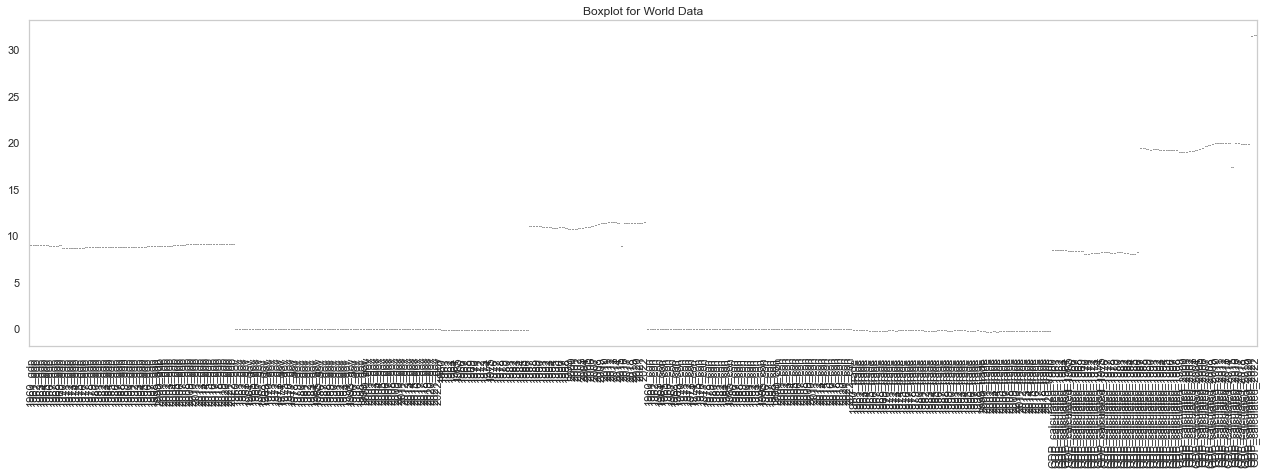

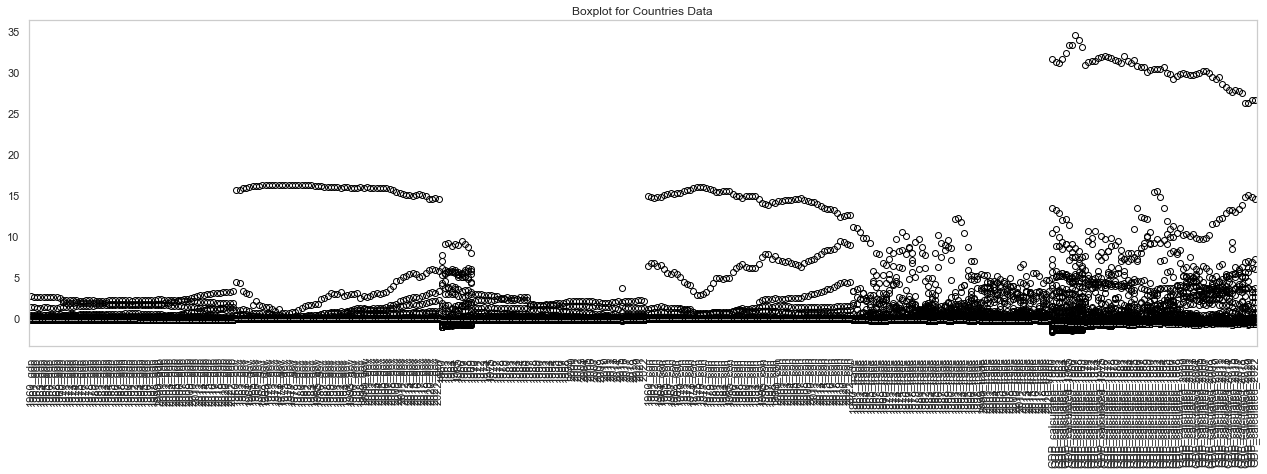

In [17]:
import matplotlib.pyplot as plt

def plot_boxplots(df, title):
    plt.figure(figsize=(22, 6))
    df.boxplot()
    plt.xticks(rotation=90)
    plt.title(title)
    plt.grid(False)
    plt.show()

plot_boxplots(df_world, "Boxplot for World Data")
plot_boxplots(df_countries, "Boxplot for Countries Data")

In [18]:
# Función para calcular outliers basados en IQR
def calculate_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

# Aplicar la función a cada DataFrame y mostrar resultados
outliers_world = calculate_outliers(df_world)
outliers_countries = calculate_outliers(df_countries)

print("Outliers in World Data:\n", outliers_world)
print("Outliers in Countries Data:\n", outliers_countries)

Outliers in World Data:
 1960_gdp               0
1961_gdp               0
1962_gdp               0
1963_gdp               0
1964_gdp               0
                      ..
GDP_calculated_2018    0
GDP_calculated_2019    0
GDP_calculated_2020    0
GDP_calculated_2021    0
GDP_calculated_2022    0
Length: 376, dtype: int64
Outliers in Countries Data:
 1960_gdp               82
1961_gdp               58
1962_gdp               58
1963_gdp               74
1964_gdp               65
                       ..
GDP_calculated_2018    38
GDP_calculated_2019    33
GDP_calculated_2020    41
GDP_calculated_2021    34
GDP_calculated_2022    34
Length: 376, dtype: int64


## Decisiones:
- En este caso, no se requiere realizar ninguna corrección de outliers. En contextos económicos, los outliers pueden representar situaciones económicas reales (como crisis o booms económicos) y pueden ser críticos para ciertos análisis.
- Dado que mi objetivo de análisis se centra en comprender el comportamiento general de la economía, considero poco relevante los **outliers** y no se requiera una transformación especial.
- Además, los outliers son pocos y se distribuyen aleatoriamente, su efecto en el modelo puede ser mínimo.

### Escala de Estimación NO APLICAR
- Los datos presentan estacionalidad, tendría que desestacionalizar antes de aplicar la Escala de Estimación, ya que esta técnica es sensible a los patrones estacionales.
- La Regresión Robusta M-estimada minimiza una función de pérdida robusta en lugar de los mínimos cuadrados, como la **regresión Huber** que es menos sensible a los outliers.
- Sin embargo, como se han realizado cambios en los datos después de la estandarización original, puede ser necesario volver a estandarizar los datos antes de aplicar la Escala de Estimación.
- Entonces, el siguiente código queda **reservado** y no se aplicará:

In [ ]:
#import statsmodels.api as sm

#X = df_countries[['GDP_calculated_2019', 'GDP_calculated_2020']]  # Ejemplo
#y = df_countries['GDP_calculated_2021']

# Añadir constante para el intercepto
#X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión robusta
#robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
#results = robust_model.fit()

#print(results.summary())

### Si se hubiese aplicado...
La regresión robusta mostró que el modelo ajustado es estadísticamente significativo y los coeficientes para **GDP_calculated_2019** y **GDP_calculated_2020** como predictores de **GDP_calculated_2021** eran ambos significativos con p-valores extremadamente bajos (prácticamente cero).

**Interpretación de los Coeficientes**:

**const**: El intercepto de **0.0103** indica el valor base de GDP_calculated_2021 cuando los predictores son cero.

**GDP_calculated_2019**: El coeficiente de **-0.3149**, osea que si todo lo demás es constante, un incremento de una unidad en el GDP_calculated_2019 está asociado con una disminución de 0.3149 unidades en el GDP_calculated_2021. Esto podría interpretarse como un efecto retardado negativo o una corrección en el crecimiento del PIB.

**GDP_calculated_2020**: El coeficiente de **1.2905** indica un fuerte impacto positivo en el GDP_calculated_2021 por cada unidad incrementada en el GDP_calculated_2020. 

**Consideraciones Estadísticas**:

**Escala de Estimación (Scale Est.)**: Indica que el modelo es resistente a la influencia de los outliers.

**Iteraciones (No. Iterations)**: El modelo convergió después de **24** iteraciones.

**Intervalos de Confianza**: Los intervalos de confianza para los coeficientes son estrechos, indicando precisión en las estimaciones de los parámetros del modelo.

Este modelo proporciona una base sólida para inferencias sobre cómo los valores pasados del PIB calculado podrían estar influyendo en los valores futuros, bajo el contexto de un modelo robusto a outliers. Estos resultados pueden ser útiles para tomar decisiones económicas informadas o para realizar proyecciones futuras basadas en tendencias pasadas.

### Análisis de Componentes Temporales
Para series temporales, es crucial entender tendencias y ciclicidad, especialmente si los datos se usarán para proyecciones o análisis predictivos.

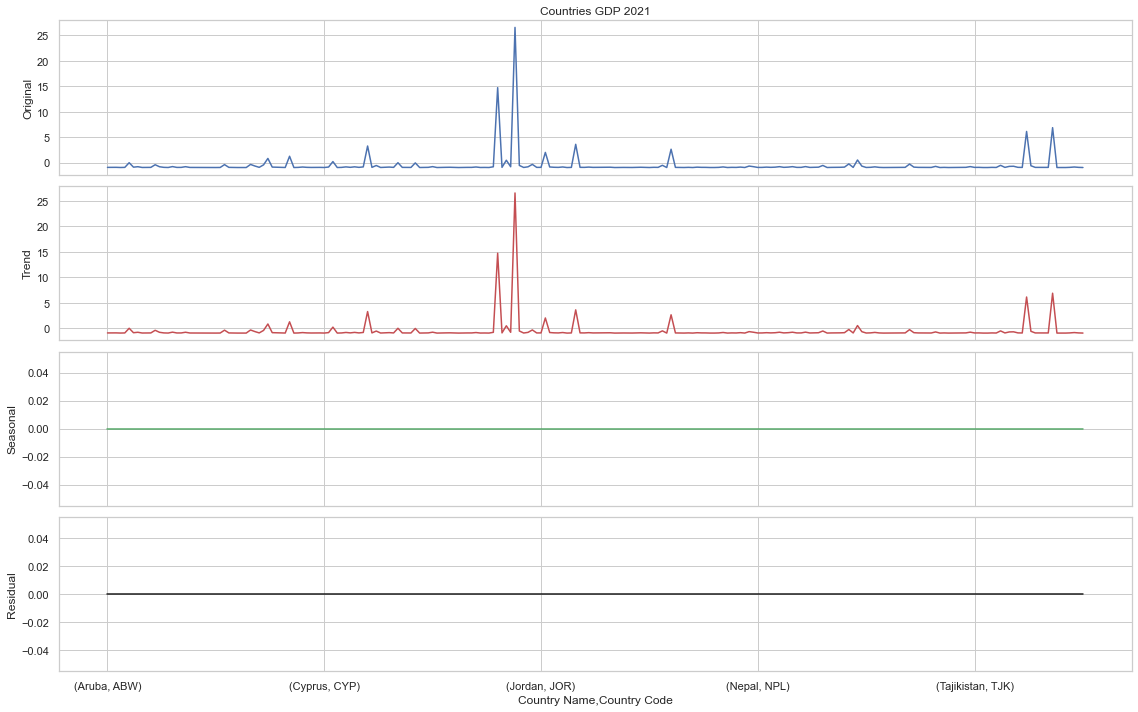

In [19]:
def decompose_time_series(series, title):
    if len(series) > 2:  
        decomposition = sm.tsa.seasonal_decompose(series, model='additive', period=1)  
        
        fig, ax = plt.subplots(4, 1, figsize=(16, 10), sharex=True)
        series.plot(ax=ax[0], color='b', title=title)
        ax[0].set_ylabel('Original')
        decomposition.trend.plot(ax=ax[1], color='r')
        ax[1].set_ylabel('Trend')
        decomposition.seasonal.plot(ax=ax[2], color='g')
        ax[2].set_ylabel('Seasonal')
        decomposition.resid.plot(ax=ax[3], color='k')
        ax[3].set_ylabel('Residual')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data to decompose {title}")

decompose_time_series(df_countries['GDP_calculated_2021'], 'Countries GDP 2021')


Los gráficos muestran la descomposición de la serie temporal del PIB calculado para el año 2021 para los países. 

**Original**: Los picos pueden representar crecimientos económicos extraordinarios o caídas, posiblemente debido a eventos económicos específicos como reformas, crisis, o booms de recursos naturales.

**Tendencia**: Algunas variaciones significativas indica que en esos países hubo cambios sustanciales en el tiempo en su actividad económica. 

**Estacional**: La componente estacional es esencialmente plana y cercana a cero en todos los casos, ya que sólo estamos viendo un año.

**Residual**: Los residuos parecen ser pequeños para la mayoría de los países, sin embargo, los picos en los residuos pueden indicar modelos de comportamiento económico que no se explican completamente por la tendencia y que podrían ser objeto de una investigación más detallada.

### Estandarización de Datos No Aplicada
Si los nuevos DataFrames son derivados de DataFrames que ya han sido estandarizados, normalmente no necesitarías re-estandarizarlos, a menos que las transformaciones realizadas en los datos (como sumas o agrupaciones por región) pudieran haber alterado la escala o la distribución de los datos. Las estadísticas descriptivas muestran valores óptimos..

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas para la estandarización
columns_to_scale = df_countries.columns[df_countries.columns.str.contains('GDP')]

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df_countries.loc[:, columns_to_scale] = scaler.fit_transform(df_countries[columns_to_scale])

# Verificar los cambios
print(df_countries[columns_to_scale].head())
print(df_countries[columns_to_scale].describe())

### Verificación de Estacionariedad
Si los nuevos DataFrames son derivados de otros que ya han verificado la ausencia de estacionariedad, generalmente no necesitarías volver a verificarlo para las mismas series temporales. Sin embargo, si se han agregado nuevas transformaciones o datos (por ejemplo, sumas o promedios de nuevas variables), sería prudente realizar una verificación de estacionariedad sobre las series resultantes para asegurar la validez de los análisis temporales.

#### ADF Test 2021 Countries

In [20]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': r[2], 'n_obs': r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Imprimir Resultados de la Prueba
    if verbose:
        print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
        print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
        print(f' Significance Level    = {signif}')
        print(f' Test Statistic        = {output["test_statistic"]}')
        print(f' No. Lags Chosen       = {output["n_lags"]}')

        for key, val in r[4].items():
            print(f' Critical value {adjust(key)} = {round(val, 3)}')

        if p_value <= signif:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")
    
    return output

# Ejemplo de aplicación
series = df_countries['GDP_calculated_2021']
result = test_stationarity(series, name='GDP_calculated_2021', verbose=True)

    Augmented Dickey-Fuller Test on "GDP_calculated_2021" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.1314
 No. Lags Chosen       = 3
 Critical value 1%     = -3.46
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


#### ADF Anual Countries

## Regresión lineal

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Variables predictoras: PIB de 2016 a 2020
predictors = ['GDP_calculated_2016', 'GDP_calculated_2017', 'GDP_calculated_2018', 'GDP_calculated_2019', 'GDP_calculated_2020']
X = df_countries[predictors]
y = df_countries['GDP_calculated_2021']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1084106968304278


Estos MSE son relativamente bajos dado que los datos están estandarizados. Estos son relativamente pequeños errores considerando la escala de los datos.

In [22]:
import numpy as np

# Calculando la varianza de GDP_calculated_2021
variance = np.var(df_countries['GDP_calculated_2021'])

# Calculando el RMSE
rmse = np.sqrt(mse)

print("Variance of GDP_calculated_2021:", variance)
print("Root Mean Squared Error (RMSE):", rmse)

Variance of GDP_calculated_2021: 5.095504994892357
Root Mean Squared Error (RMSE): 0.3292577969166832


- La varianza de los datos estandarizados es más alta que 1, lo cual puede indicar una distribución más dispersa de lo esperado para datos puramente estandarizados. Tal vez porque los datos tienen variabilidad inherente que podría estar afectando el desempeño del modelo.
- Dado que el RMSE es considerablemente menor que la raíz cuadrada de la varianza de los datos (~2.26), esto indica que el modelo está haciendo un buen trabajo al capturar la variabilidad de los datos. Sin embargo, el RMSE todavía representa un error significativo en términos de la escala de los datos.

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

predictors = ['GDP_calculated_2016', 'GDP_calculated_2017', 'GDP_calculated_2018', 'GDP_calculated_2019', 'GDP_calculated_2020']
X = df_countries[predictors]
y = df_countries['GDP_calculated_2021']

model = LinearRegression()

# Cross-Validation
# Usamos 5 pliegues (folds) y medimos el error cuadrático medio negativo
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertimos los scores a positivo porque 'neg_mean_squared_error' devuelve valores negativos
mse_scores = -scores

# Calculamos el promedio y la desviación estándar de los MSE para evaluar la consistencia del modelo
print("Resultados de MSE de cada fold:", mse_scores)
print("MSE promedio:", mse_scores.mean())
print("Desviación estándar de MSE:", mse_scores.std())

# Esto proporciona una visión de cuán variados son los resultados del modelo entre diferentes subconjuntos de datos.

Resultados de MSE de cada fold: [0.6766614  0.08180557 0.59952202 0.26042559 0.16903139]
MSE promedio: 0.35748919398012907
Desviación estándar de MSE: 0.23722981798694917


- Con el MSE de cada fold muestra inestabilidad en cómo el modelo se comporta con diferentes subconjuntos de datos.
- La Desviación estándar de MSE es alta, hay que ver la división entre subconjuntos de datos.

### Regresión de Cresta (Ridge Regression)
La regresión de cresta ajusta un modelo de regresión lineal que también incluye un término de penalización L2. Esta penalización puede ayudar a reducir la varianza del modelo sin aumentar significativamente el sesgo, lo cual es útil en situaciones de alta variabilidad entre los folds de validación cruzada.

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Definir el modelo de regresión de cresta
ridge_model = Ridge(alpha=1.0)  # Alpha es el parámetro de regularización

# Aplicar Cross-Validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE de Regresión de Cresta:", -ridge_scores.mean())

MSE de Regresión de Cresta: 0.46595401888464466


La Regresión de Cresta ha mostrado un MSE más alto en comparación con tus modelos lineales iniciales. Recordando que el MSE inicial más bajo fue de aproximadamente 0.036 y otro fue 0.108, el MSE de 0.466 sugiere que la regresión de cresta no ha mejorado el rendimiento y podría estar demasiado regularizada o no adecuadamente configurada para los datos. 

### Regresión Lasso
Lasso es similar a la regresión de cresta, pero utiliza una penalización L1, que puede llevar a coeficientes a cero, ofreciendo una especie de selección automática de características. Esto puede ser útil si algunos predictores son redundantes o menos relevantes.

In [25]:
from sklearn.linear_model import Lasso

# Definir el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Alpha controla la cantidad de shrinkage

# Aplicar validación cruzada
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE de Lasso:", -lasso_scores.mean())

MSE de Lasso: 0.317814287588202


Aun es más alto que los modelos lineales básicos anteriores. Parece que no todos los predictores son igualmente útiles o que la penalización está eliminando información valiosa. 

### Modelos de Árboles de Decisión
Los árboles de decisión son más flexibles que los modelos lineales y pueden capturar patrones no lineales y complejidades que los modelos lineales no pueden.

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Definir el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(max_depth=5)  # Controla la profundidad del árbol

# Aplicar validación cruzada
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE de Árbol de Decisión:", -tree_scores.mean())

MSE de Árbol de Decisión: 1.3248627252229919


Es un MSE mucho más alto (1.47) en comparación con cualquier otro modelo probado. Esto sugiere que, aunque los árboles de decisión pueden modelar relaciones no lineales, pueden estar sobreajustándose a los datos de entrenamiento o simplemente no se adaptan bien a la estructura de tu conjunto de datos específico. La naturaleza de los árboles de decisión los hace muy sensibles a la variabilidad en los datos, lo que puede llevar a un rendimiento inconsistente.

### Random Forest
Random Forest es un método de ensamble que utiliza múltiples árboles de decisión para reducir el riesgo de sobreajuste, lo que es común en árboles de decisión simples. Ofrece un buen balance entre sesgo y varianza y es muy efectivo en muchos problemas prácticos.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators controla el número de árboles

# Aplicar validación cruzada
forest_scores = cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE de Random Forest:", -forest_scores.mean())

MSE de Random Forest: 1.8480368646500238


Aunque generalmente es un modelo robusto y efectivo para muchos problemas de regresión, ha mostrado el peor rendimiento con un MSE de 1.848. Esto es sorprendente ya que los modelos de ensamble como Random Forest suelen mejorar el rendimiento de los árboles de decisión individuales a través de la agregación de resultados. En este caso, el alto MSE podría indicar una mala configuración de hiperparámetros, una necesidad de más árboles en el ensamble, o simplemente que los datos no son adecuados para este tipo de modelado debido a su estructura o el tipo de relación entre las variables.

**Conclusiones**
Basándote en estos resultados, parece que los modelos más simples, como el lineal básico y Lasso, están funcionando mejor en este conjunto de datos. Esto podría indicar que la relación entre las variables predictoras y la variable objetivo es más lineal, o que la naturaleza de los datos no se presta a la complejidad adicional introducida por los árboles de decisión o los modelos de ensamble.

# Mi Perspectiva como Economista

1. Naturaleza de los Datos Macroeconómicos
Los datos macroeconómicos, como el PIB, el consumo, la inversión, y los gastos del gobierno, a menudo exhiben características como tendencias a largo plazo, ciclicidad, y posibles no linealidades. Además, estos datos pueden estar sujetos a cambios estructurales debido a políticas económicas, crisis financieras, o cambios tecnológicos significativos.

- Tendencias y Estacionariedad: Muchos indicadores macroeconómicos son no estacionarios, es decir, tienen propiedades estadísticas que cambian con el tiempo. Esto puede incluir una media o varianza que varía con el tiempo. Los modelos lineales y algunos modelos no lineales asumen estacionariedad, lo que puede llevar a predicciones sesgadas o incorrectas si se aplican directamente a datos no estacionarios.

- Cointegración: En macroeconomía, es común que series temporales múltiples compartan una tendencia común a largo plazo a pesar de ser no estacionarias individualmente. Esto se conoce como cointegración. Modelos que no consideran la posibilidad de cointegración pueden no captar adecuadamente la dinámica a largo plazo entre las variables.

2. Relaciones Entre Variables
En macroeconomía, las relaciones entre variables a menudo son complejas y pueden ser influenciadas por numerosos factores externos e internos.

- Endogeneidad y Exogeneidad: Las relaciones entre variables macroeconómicas pueden ser endógenas, lo que significa que pueden influirse mutuamente. Por ejemplo, el consumo y el PIB pueden afectarse mutuamente. Los modelos que no manejan adecuadamente la endogeneidad pueden dar lugar a estimaciones sesgadas.

- Cambios Estructurales: Los cambios en la política económica, grandes eventos económicos (como crisis financieras), o innovaciones tecnológicas pueden causar cambios estructurales en las relaciones económicas. Si un modelo no puede adaptarse a cambios estructurales a lo largo del tiempo, puede perder precisión a medida que el contexto económico subyacente evoluciona.

## Verificación de Supuestos Económicos y Estadísticos
Sin embargo continuaré con otros supuestos, como la prueba de Breusch-Pagan o la prueba de Durbin-Watson.

### Modelo ARIMA
El modelo ARIMA es útil para modelar series temporales que muestran patrones claros de tendencias o estacionalidad.

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

data = pd.read_csv('df_countries.csv')  
time_series = data['2014']

model_arima = ARIMA(time_series, order=(1,1,1))  
results_arima = model_arima.fit()
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   2014   No. Observations:                  226
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  47.490
Date:                Tue, 14 May 2024   AIC                            -88.980
Time:                        14:20:49   BIC                            -78.732
Sample:                             0   HQIC                           -84.844
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0259      0.471     -0.055      0.956      -0.948       0.896
ma.L1         -1.0000     21.365     -0.047      0.963     -42.874      40.874
sigma2         0.0375      0.800      0.047      0.9

- Un valor P alto (0.95) sugiere que no hay autocorrelación significativa en los residuos, lo cual es bueno.
- Jarque-Bera: Prueba la normalidad de los residuos; un valor P de 0.00 rechaza la hipótesis de normalidad, indicando que los residuos no son normales.
- Heteroskedasticity: Con un P de 0.00, hay evidencia de heterocedasticidad.

**Interpretación**
El modelo SARIMAX aplicado no parece capturar todas las dinámicas de los datos, como se evidencia por los coeficientes de AR y MA no significativos y las pruebas de diagnóstico que muestran problemas con la normalidad y la heterocedasticidad de los residuos. 

**Opinión personal**: Esto puede deberse a la necesidad de un modelo más complejo o diferentemente especificado, o puede reflejar la naturaleza desafiante de modelar datos macroeconómicos con estructuras subyacentes complejas.

### Modelo GARCH
Utilizado para modelar la volatilidad de series financieras o económicas.

In [29]:
from arch import arch_model

# Ajuste del modelo GARCH
garch_model = arch_model(time_series, vol='Garch', p=1, q=1)  
results_garch = garch_model.fit(update_freq=5)
print(results_garch.summary())

Iteration:      5,   Func. Count:     33,   Neg. LLF: -4.4343562005323705
Iteration:     10,   Func. Count:     68,   Neg. LLF: 74.82844976640274
Iteration:     15,   Func. Count:    101,   Neg. LLF: 74.88308704571364
Optimization terminated successfully    (Exit mode 0)
            Current function value: -59.97551055030441
            Iterations: 23
            Function evaluations: 123
            Gradient evaluations: 19
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   2014   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                59.9755
Distribution:                  Normal   AIC:                          -111.951
Method:            Maximum Likelihood   BIC:                          -98.2689
                                        No. Observations:                  226
Date:             

C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03733. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**Interpretación**
El modelo GARCH(1,1) indica que la volatilidad de la serie para el año 2014 es altamente persistente (beta cercano a 1), lo que es típico en datos financieros donde la volatilidad tiende a agruparse. Sin embargo, los choques específicos en la serie (medidos por alpha) no parecen tener un impacto significativo en la volatilidad futura, lo cual es atípico para un modelo GARCH y podría sugerir que los datos no exhiben mucha volatilidad de choques o que el modelo necesita ser ajustado o complementado con otros componentes.

### Homocedasticidad
Puedes verificar la homocedasticidad utilizando pruebas como la prueba de Breusch-Pagan o visualizando los residuos de un modelo regresivo contra los valores ajustados. La homogeneidad de la varianza en los residuos es crucial para inferencias confiables en la regresión.

C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


p-value de la prueba de Breusch-Pagan: 5.3068079966277775e-05


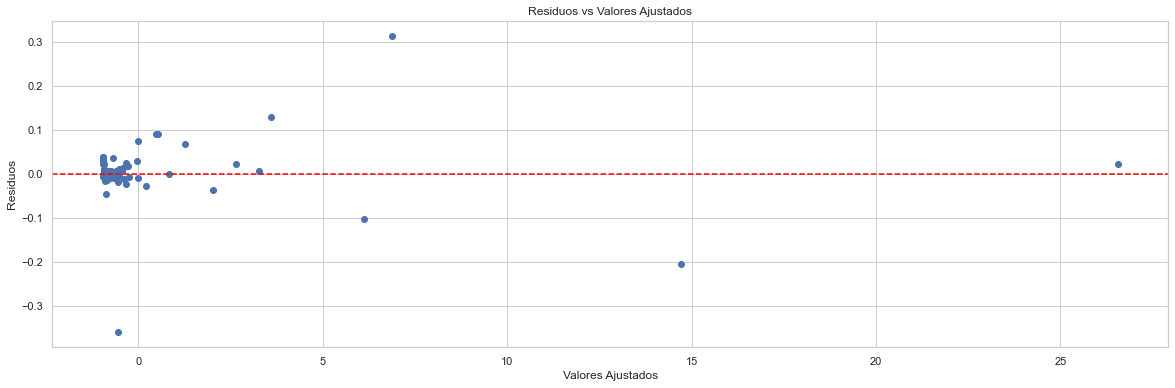

In [30]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

modelo = 'GDP_calculated_2022 ~ GDP_calculated_2021'

model = ols(modelo, data=df_countries).fit()

residuos = model.resid

# Prueba de Breusch-Pagan
_, pvalue, _, _ = het_breuschpagan(residuos, model.model.exog)
print(f"p-value de la prueba de Breusch-Pagan: {pvalue}")

# Visualización de residuos
plt.figure(figsize=(20, 6))
plt.scatter(model.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# Si el p-value es menor a 0.05, existe evidencia de heterocedasticidad.

El bajo **p-value** de la prueba de **Breusch-Pagan (5.31e-05)** indica que hay evidencia significativa de heterocedasticidad en los residuos del modelo. E

La visualización también muestra algunos signos de heterocedasticidad, dado que los residuos no parecen distribuirse uniformemente en torno a la línea roja horizontal, especialmente evidente con algunos puntos alejados de la línea central hacia los valores ajustados más altos.

#### Weighted Least Squares (WLS)
Utiliza los residuos de un modelo OLS para estimar los pesos y aplica WLS para considerar la heterocedasticidad. Los pesos pueden basarse en el inverso de los residuos al cuadrado de un modelo OLS preliminar.

In [31]:
import statsmodels.api as sm

X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade']]  # G + I + C + T
y = df_countries['GDP_calculated_2021']  # Traget = GDP

# Constante
X = sm.add_constant(X)

# Modelo OLS para obtener los residuos
model_ols = sm.OLS(y, X).fit()
residuos = model_ols.resid

# Inverso de los residuos al cuadrado
pesos = 1.0 / (residuos ** 2)

# Aplicar WLS con los pesos obtenidos
model_wls = sm.WLS(y, X, weights=pesos).fit()

print(model_wls.summary())

                             WLS Regression Results                            
Dep. Variable:     GDP_calculated_2021   R-squared:                       1.000
Model:                             WLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.160e+06
Date:                 Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                         14:21:07   Log-Likelihood:                 794.87
No. Observations:                  226   AIC:                            -1580.
Df Residuals:                      221   BIC:                            -1563.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.005    -15.23

#### Normalidad de los Residuos
Utiliza pruebas como Shapiro-Wilk o Kolmogorov-Smirnov después de ajustar un modelo, o incluso visualiza un Q-Q plot de los residuos. La normalidad es esencial para la validez de muchas pruebas estadísticas, incluyendo aquellos en regresiones lineales. Un p-value pequeño en la prueba de Shapiro-Wilk (típicamente menor que 0.05) sugeriría que los residuos no se distribuyen normalmente, lo cual puede ser una indicación de que el modelo no captura toda la complejidad de los datos o que existen outliers.

In [32]:
import scipy.stats as stats

residuos = model_wls.resid

shapiro_test = stats.shapiro(residuos)

print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test:
Statistic: 0.22526339595297296
p-value: 1.2498590524151944e-29


El test de Shapiro-Wilk tiene un valor muy bajo para la estadística y un p-valor extremadamente pequeño, es una falta de normalidad lo que afecta la confiabilidad de las pruebas de significancia y los intervalos de confianza para los coeficientes del modelo.

#### Ausencia de Multicolinealidad
Antes de realizar un modelado regresivo, revisa la multicolinealidad entre variables independientes. Esto se puede hacer calculando el Factor de Inflación de la Varianza (VIF). Un VIF mayor a 10 (o en casos más estrictos, mayor a 5) puede indicar problemas significativos de multicolinealidad.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF para cada variable en el modelo
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature        VIF
0       const   1.666738
1    2020_gov  16.399994
2        2020   1.052399
3    2020_con  16.402942
4  2020_trade   1.050951


Los resultados del **Factor de Inflación de Varianza (VIF)** muestran que las variables **2020_gov** y **2020_con** tienen VIFs muy altos (mayores de 10), lo que sugiere una fuerte multicolinealidad. Esto significa que estas variables predictoras están altamente correlacionadas con otras predictoras en el modelo, lo que puede hacer que los coeficientes del modelo sean inestables y difíciles de interpretar. Tal vez los excluya para reducir la multicolinealidad.

### Regresión Robusta
Para mejorar el modelo usaré usando el método RLM (Robust Linear Model) de StatsModels

                     Robust linear Model Regression Results                    
Dep. Variable:     GDP_calculated_2021   No. Observations:                  226
Model:                             RLM   Df Residuals:                      221
Method:                           IRLS   Df Model:                            4
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 14 May 2024                                         
Time:                         14:21:19                                         
No. Iterations:                     50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0950      0.000   -194.21

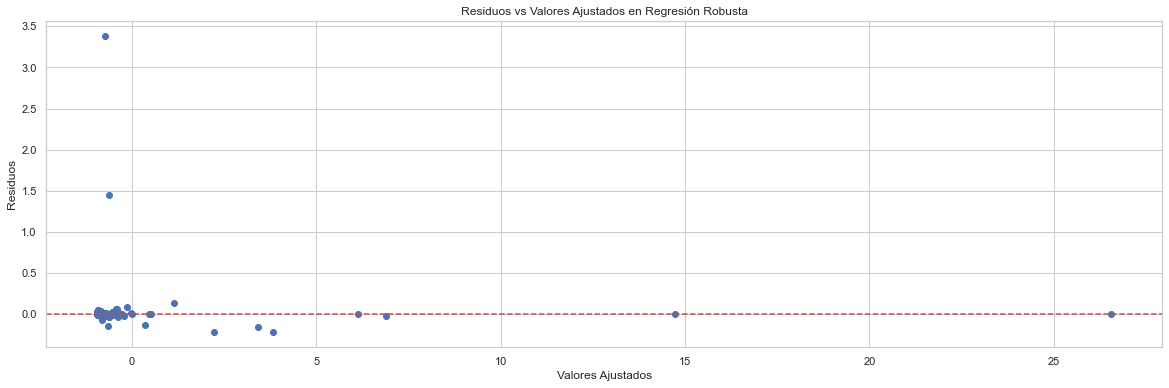

In [34]:
import statsmodels.api as sm

X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade']]  
y = df_countries['GDP_calculated_2021']  

# Constante
X = sm.add_constant(X)

# Regresión Lineal Robusta
model_robust = sm.RLM(y, X).fit()

print(model_robust.summary())

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.scatter(model_robust.fittedvalues, model_robust.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados en Regresión Robusta')
plt.show()

Valores p extremadamente bajos para los coeficientes del modelo. Esto sugiere que los predictores son altamente significativos para explicar la variabilidad en el PIB calculado para 2021.

En cuanto a la gráfica de residuos vs. valores ajustados, la dispersión de los residuos parece más controlada comparada con la regresión OLS tradicional, pero todavía se pueden observar algunos valores atípicos pronunciados, especialmente para valores ajustados bajos. Estos residuos podrían indicar que, aunque el modelo maneja mejor los outliers en comparación con OLS, aún podrían existir características no capturadas por el modelo actual.

### Transformación de Datos NO APLICARÉ
Logaritmo para reducir la asimetría y estabilizar la varianza de los predictores que sean estrictamente positivos.
Raíz cuadrada para reducir el efecto de los valores atípicos en los predictores con amplias variaciones.

## Verificación de Supuestos y Diagnóstico del Modelo

                     Robust linear Model Regression Results                    
Dep. Variable:     GDP_calculated_2021   No. Observations:                  226
Model:                             RLM   Df Residuals:                      221
Method:                           IRLS   Df Model:                            4
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 14 May 2024                                         
Time:                         14:21:25                                         
No. Iterations:                     50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0950      0.000   -194.21

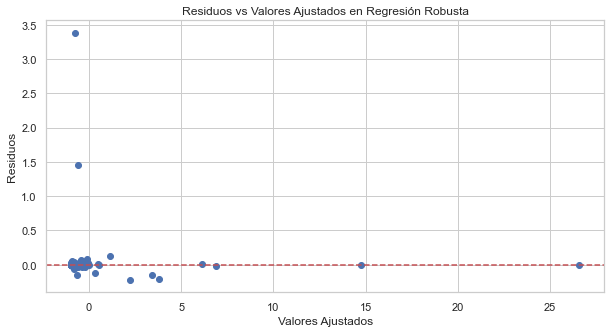

Shapiro-Wilk test p-value: 3.1191042084835655e-31
      feature        VIF
0       const   1.666738
1    2020_gov  16.399994
2        2020   1.052399
3    2020_con  16.402942
4  2020_trade   1.050951


In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade']]
y = df_countries['GDP_calculated_2021']
X = sm.add_constant(X)  # Añadir una constante

# Ajustar el modelo robusto
model_robust = sm.RLM(y, X).fit()

# Imprimir el resumen del modelo
print(model_robust.summary())

# Residuos vs Valores Ajustados
plt.figure(figsize=(10, 5))
plt.scatter(model_robust.fittedvalues, model_robust.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados en Regresión Robusta')
plt.show()

# Test de Shapiro-Wilk para normalidad de residuos
from scipy import stats
print("Shapiro-Wilk test p-value:", stats.shapiro(model_robust.resid)[1])

# VIF para detectar multicolinealidad
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

## Incluir GPI como variable dummy 
El GPI es un indicador de bienestar econémico de los paises o **Global Peace Index**.
Después de observar que el modelo se desviaba por aplicar algunos argumentos, creo que es momento de incorporar nuevas variables.

In [36]:
import pandas as pd

gpi_data = pd.read_excel('GPI.xlsx')

print(gpi_data.head())

  Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
0  Afghanistan     0     0     0     0     0     0     0     0     0  ...   
1      Albania     0     0     0     0     0     0     0     0     0  ...   
2      Algeria     0     0     0     0     0     0     0     0     0  ...   
3       Angola     0     0     0     0     0     0     0     0     0  ...   
4    Argentina     0     0     0     0     0     0     0     0     0  ...   

   2013  2014  2015    2016   2017   2018   2019   2020   2021   2022  
0     0   3.0  3.23  3.4440  3.658  3.623  3.674  3.641  3.641  3.650  
1     0   1.6  1.33  1.2795  1.229  1.237  1.225  1.403  1.403  1.403  
2     0   2.2  2.00  2.0445  2.089  1.912  1.927  2.116  2.088  2.068  
3     0   1.8  1.35  1.4270  1.504  1.403  1.418  1.625  1.625  1.666  
4     0   1.4  1.33  1.3665  1.403  1.201  1.201  1.201  1.201  1.201  

[5 rows x 64 columns]


## Crear la variable dummy para el año 2021

In [37]:
# Crear una variable dummy donde el GPI del año 2021 mayor a 2.5 es 1, de lo contrario 0
gpi_data['GPI_dummy'] = (gpi_data[2021] > 2.5).astype(int)

# Fusionar con df_countries
# Asegúrate de que 'Country' en df_countries y 'Country Name' en gpi_data coincidan
df_countries = df_countries.merge(gpi_data[['Country Name', 'GPI_dummy']], left_on='Country Name', right_on='Country Name', how='left')

# Verificar que la unión se haya hecho correctamente
print(df_countries.head())

  Country Name  1960_gdp  1961_gdp  1962_gdp  1963_gdp  1964_gdp  1965_gdp  \
0        Aruba -0.201874 -0.200982 -0.200327 -0.199863 -0.200426 -0.202832   
1  Afghanistan -0.201874 -0.200982 -0.200327 -0.199863 -0.200426 -0.202832   
2       Angola -0.201874 -0.200982 -0.200327 -0.199863 -0.200426 -0.202832   
3      Albania -0.201874 -0.200982 -0.200327 -0.199863 -0.200426 -0.202832   
4      Andorra -0.201874 -0.200982 -0.200327 -0.199863 -0.200426 -0.202832   

   1966_gdp  1967_gdp  1968_gdp  ...  GDP_calculated_2014  \
0 -0.202705 -0.202662 -0.203255  ...            -1.023442   
1 -0.202705 -0.202662 -0.203255  ...            -1.021407   
2 -0.202705 -0.202662 -0.203255  ...            -0.657339   
3 -0.202705 -0.202662 -0.203255  ...            -1.030680   
4 -0.202705 -0.202662 -0.203255  ...            -1.023472   

   GDP_calculated_2015  GDP_calculated_2016  GDP_calculated_2017  \
0            -1.046426            -0.965575            -0.972609   
1            -1.044415      

## Reajustar el Modelo con la Nueva Variable

In [38]:
import numpy as np

# Revisar si hay valores infinitos y reemplazarlos con NaN
df_countries.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar cualquier fila que tenga algún NaN
df_countries.dropna(inplace=True)

for column in df_countries.columns:
    if df_countries[column].isnull().any():
        df_countries[column].fillna(df_countries[column].mean(), inplace=True)

# Verificar el DataFrame después de la limpieza
print(df_countries.head())

           Country Name  1960_gdp  1961_gdp  1962_gdp  1963_gdp  1964_gdp  \
1           Afghanistan -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
2                Angola -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
3               Albania -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
6  United Arab Emirates -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
7             Argentina -0.098248 -0.095184 -0.101961 -0.113989 -0.110743   

   1965_gdp  1966_gdp  1967_gdp  1968_gdp  ...  GDP_calculated_2014  \
1 -0.202832 -0.202705 -0.202662 -0.203255  ...            -1.021407   
2 -0.202832 -0.202705 -0.202662 -0.203255  ...            -0.657339   
3 -0.202832 -0.202705 -0.202662 -0.203255  ...            -1.030680   
6 -0.202832 -0.202705 -0.202662 -0.203255  ...            -0.939570   
7 -0.103947 -0.110039 -0.109995 -0.112002  ...            -0.878191   

   GDP_calculated_2015  GDP_calculated_2016  GDP_calculated_2017  \
1            -1.044415            -0.96357

In [39]:
# Preparando los datos para el modelo
X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade', 'GPI_dummy']]
X = sm.add_constant(X)  # Añadir una constante
y = df_countries['GDP_calculated_2021']  # La variable objetivo

# Asegurarse de que no hay valores faltantes
print("Valores faltantes en X:", X.isnull().sum())
print("Valores faltantes en y:", y.isnull().sum())

# Ajustar el modelo de regresión robusta
model_robust = sm.RLM(y, X).fit()
print(model_robust.summary())

Valores faltantes en X: const         0
2020_gov      0
2020          0
2020_con      0
2020_trade    0
GPI_dummy     0
dtype: int64
Valores faltantes en y: 0
                     Robust linear Model Regression Results                    
Dep. Variable:     GDP_calculated_2021   No. Observations:                  160
Model:                             RLM   Df Residuals:                      154
Method:                           IRLS   Df Model:                            5
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 14 May 2024                                         
Time:                         14:21:44                                         
No. Iterations:                     50                                         
                 coef    std err         

### Análisis de los Resultados del Modelo
**Coeficientes y Significancia**:
- Los coeficientes de 2020_gov, 2020, y 2020_con son significativos y sus intervalos de confianza no incluyen el cero, lo que indica que son predictores relevantes del GDP_calculated_2021.
- El coeficiente para 2020_trade también es significativo y positivo, aunque el efecto es menor comparado con los otros predictores.
- La variable GPI_dummy tiene un coeficiente muy pequeño y no es estadísticamente significativa (p-value = 0.604). Esto sugiere que la presencia de un índice de paz global alto o bajo no tiene un efecto significativo en el PIB calculado para 2021, al menos no en el modelo actual con las otras variables controladas.

**Interpretación Económica**:
- Las variables representativas del año 2020 (2020_gov, 2020, 2020_con, 2020_trade) tienen un fuerte impacto en el PIB calculado de 2021, lo que puede reflejar cómo los eventos económicos o las políticas del año anterior afectaron el desempeño económico en 2021.
- La falta de impacto significativo de GPI_dummy puede ser un indicativo de que los efectos del índice de paz son más complejos o que otros factores no considerados en el modelo están moderando o enmascarando este efecto.

### Examinar Otras Variables
Incuiré las variables **Inflación** e **Interés** que pueden tener un impacto en el PIB calculado.

In [40]:
import pandas as pd

# Cargar datos de tasas de interés
interest_data = pd.read_excel('Interest.xlsx')
# Cargar datos de inflación
inflation_data = pd.read_excel('Inflation.xlsx')

print(interest_data.head())
print(inflation_data.head())

                  Country Name Country Code  1960  1961  1962  1963  1964  \
0                        Aruba          ABW   NaN   NaN   NaN   NaN   NaN   
1  Africa Eastern and Southern          AFE   NaN   NaN   NaN   NaN   NaN   
2                  Afghanistan          AFG   NaN   NaN   NaN   NaN   NaN   
3   Africa Western and Central          AFW   NaN   NaN   NaN   NaN   NaN   
4                       Angola          AGO   NaN   NaN   NaN   NaN   NaN   

   1965  1966  1967  ...       2013       2014       2015       2016  \
0   NaN   NaN   NaN  ...  10.709708   3.213869   0.157925   7.982851   
1   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
2   NaN   NaN   NaN  ...   9.784496  14.351689  12.252548  17.583938   
3   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
4   NaN   NaN   NaN  ...  12.610802  12.380530  21.144182  -4.922063   

        2017      2018      2019      2020       2021      2022  
0   9.789287  2.437682 -0.371564  7.73

In [41]:
# Unir df_countries con interest_data e inflation_data
df_countries = df_countries.merge(interest_data, on='Country Name', how='left')
df_countries = df_countries.merge(inflation_data, on='Country Name', how='left')

print(df_countries.head())

           Country Name  1960_gdp  1961_gdp  1962_gdp  1963_gdp  1964_gdp  \
0           Afghanistan -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
1                Angola -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
2               Albania -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
3  United Arab Emirates -0.201874 -0.200982 -0.200327 -0.199863 -0.200426   
4             Argentina -0.098248 -0.095184 -0.101961 -0.113989 -0.110743   

   1965_gdp  1966_gdp  1967_gdp  1968_gdp  ...      2013      2014      2015  \
0 -0.202832 -0.202705 -0.202662 -0.203255  ...  7.385772  4.673996 -0.661709   
1 -0.202832 -0.202705 -0.202662 -0.203255  ...  8.777814  7.280387  9.353840   
2 -0.202832 -0.202705 -0.202662 -0.203255  ...  1.937621  1.625865  1.896174   
3 -0.202832 -0.202705 -0.202662 -0.203255  ...  1.101118  2.346269  4.069966   
4 -0.103947 -0.110039 -0.109995 -0.112002  ...       NaN       NaN       NaN   

        2016       2017       2018       2019       2020

### Interacciones y No Linearidades
Exploraré la posibilidad de interacciones entre las variables y la no linealidades para capturar mejor las relaciones complejas.

In [42]:
# Imprimir los nombres de las columnas de interest_data e inflation_data para verificar
print("Columnas en interest_data:", interest_data.columns)
print("Columnas en inflation_data:", inflation_data.columns)

Columnas en interest_data: Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')
Columnas en inflation_data: Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992',

In [43]:
# Renombrar columnas si es necesario
interest_data.rename(columns={'Rate': 'Interest Rate'}, inplace=True)
inflation_data.rename(columns={'Rate': 'Inflation Rate'}, inplace=True)

In [44]:
# Especificar Sufijos al Fusionar
# Unir df_countries con interest_data
df_countries = df_countries.merge(interest_data, on='Country Name', how='left', suffixes=('', '_interest'))

# Unir el resultado con inflation_data
df_countries = df_countries.merge(inflation_data, on='Country Name', how='left', suffixes=('', '_inflation'))

In [45]:
# Seleccionar las columnas de interés y de inflación del año 2021
df_countries['Interest Rate 2021'] = df_countries['2021_interest']
df_countries['Inflation Rate 2021'] = df_countries['2021_inflation']

# Crear interacciones entre la tasa de interés y GPI, y la tasa de inflación y GPI
df_countries['interest_gpi_interaction'] = df_countries['Interest Rate 2021'] * df_countries['GPI_dummy']
df_countries['inflation_gpi_interaction'] = df_countries['Inflation Rate 2021'] * df_countries['GPI_dummy']

# Preparar los datos para el modelo
X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade', 'GPI_dummy', 'Interest Rate 2021', 'Inflation Rate 2021', 'interest_gpi_interaction', 'inflation_gpi_interaction']]
X = sm.add_constant(X)  # Añadir una constante
y = df_countries['GDP_calculated_2021']  # La variable objetivo

# Asegurarte de que no hay NaNs en X o y
X.dropna(inplace=True)
y = y[X.index]  # Asegurar que y solo contiene índices de X

# Ajustar el modelo
model_robust = sm.RLM(y, X).fit()
print(model_robust.summary())

                     Robust linear Model Regression Results                    
Dep. Variable:     GDP_calculated_2021   No. Observations:                   77
Model:                             RLM   Df Residuals:                       67
Method:                           IRLS   Df Model:                            9
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 14 May 2024                                         
Time:                         14:22:02                                         
No. Iterations:                     38                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

### Análisis de Subconjuntos
Analizar subconjuntos de países, para ver si el efecto del índice de paz varía significativamente entre estos grupos.

Los países con un índice GPI más alto (menos pacíficos) tienen un PIB más alto en este modelo, lo cual es interesante y podría merecer una investigación más profunda sobre la naturaleza de esta relación', te puedo dar como ejemplo que un país como Estados Unidos con un alto PBI estan surguiendo violencia internas por diversos motivos (raciales, homofóbica, contra inmigrantes, creencias religiosas, posiciones nacionalistas, feminicidio), mientras que Ruanda ha mejorado en tres décadas en donde la reconciliación entre tribus a hecho que sea un lugar relativamente pacífico y con un PBI no destacable.
Para analizar subconjuntos de países para ver si el efecto del índice de paz varía significativamente entre estos grupos, suguiero los siguiente:
- **grupo_economías_grandes: 'Germany', 'France', 'United State', 'Switzerland', 'Sweden'**
- **grupo economías_pequeñas: 'Peru', 'Colombia', 'Estonia', 'Uruguay', 'Portugal'**

In [46]:
# Definir los grupos de países
grupo_economias_grandes = ['Germany', 'France', 'United States', 'Switzerland', 'Sweden']
grupo_economias_pequeñas = ['Peru', 'Colombia', 'Estonia', 'Uruguay', 'Portugal']

# Asegúrate de que los nombres de los países estén correctamente escritos como aparecen en tu DataFrame

In [47]:
# Filtrar los DataFrames por grupo
df_grandes = df_countries[df_countries['Country Name'].isin(grupo_economias_grandes)]
df_pequenas = df_countries[df_countries['Country Name'].isin(grupo_economias_pequeñas)]

In [48]:
# Eliminar filas con valores NaN en el DataFrame para economías grandes
df_grandes = df_grandes.dropna(subset=['2020_gov', '2020', '2020_con', '2020_trade', 'GPI_dummy', 'Interest Rate 2021', 'Inflation Rate 2021', 'interest_gpi_interaction', 'inflation_gpi_interaction', 'GDP_calculated_2021'])

# Eliminar filas con valores NaN en el DataFrame para economías pequeñas
df_pequenas = df_pequenas.dropna(subset=['2020_gov', '2020', '2020_con', '2020_trade', 'GPI_dummy', 'Interest Rate 2021', 'Inflation Rate 2021', 'interest_gpi_interaction', 'inflation_gpi_interaction', 'GDP_calculated_2021'])

In [49]:
# Función para imputar valores faltantes con la media
def imputar_con_media(df):
    for column in ['2020_gov', '2020', '2020_con', '2020_trade', 'GPI_dummy', 'Interest Rate 2021', 'Inflation Rate 2021', 'interest_gpi_interaction', 'inflation_gpi_interaction']:
        if df[column].isnull().any():
            df[column].fillna(df[column].mean(), inplace=True)
    return df

# Imputar valores faltantes en ambos DataFrames
df_grandes = imputar_con_media(df_grandes)
df_pequenas = imputar_con_media(df_pequenas)


### Validación del Modelo
Finalmente, valida el modelo utilizando un conjunto de datos de prueba o mediante técnicas de validación cruzada para asegurar que el modelo generaliza bien a nuevos datos.

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm

# Supongamos que df es tu DataFrame y ya está limpio y listo para usar
X = df_countries[['2020_gov', '2020', '2020_con', '2020_trade', 'Interest Rate 2021', 'Inflation Rate 2021', 'interest_gpi_interaction', 'inflation_gpi_interaction']]
y = df_countries['GDP_calculated_2021']

# Añadir una constante a X
X = sm.add_constant(X)

In [51]:
df_countries.values[:376]

array([['Afghanistan', -0.2018738832349514, -0.2009817132062104, ...,
        nan, nan, nan],
       ['Angola', -0.2018738832349514, -0.2009817132062104, ...,
        25.7542656453085, -0.0, 0.0],
       ['Albania', -0.2018738832349514, -0.2009817132062104, ...,
        2.04147163139549, 0.0, 0.0],
       ...,
       ['South Africa', -0.1696027393539647, -0.1684367115660035, ...,
        4.61167217803206, 0.0, 0.0],
       ['Zambia', -0.2214833790799845, -0.2203719098604074, ...,
        22.0207676245778, nan, 0.0],
       ['Zimbabwe', -0.2209943299706016, -0.2197217042515599, ...,
        98.5461050920624, -0.0, 0.0]], dtype=object)

In [52]:
df_countries.isnull().sum()

Country Name                  0
1960_gdp                      0
1961_gdp                      0
1962_gdp                      0
1963_gdp                      0
                             ..
2022_inflation               20
Interest Rate 2021           78
Inflation Rate 2021          17
interest_gpi_interaction     78
inflation_gpi_interaction    17
Length: 638, dtype: int64

In [53]:
df_countries.iloc[:376].isnull().sum()

Country Name                  0
1960_gdp                      0
1961_gdp                      0
1962_gdp                      0
1963_gdp                      0
                             ..
2022_inflation               20
Interest Rate 2021           78
Inflation Rate 2021          17
interest_gpi_interaction     78
inflation_gpi_interaction    17
Length: 638, dtype: int64

In [54]:
# Verificar NaNs en las primeras 376 filas y los tipos de datos
print(df_countries.iloc[:376].isnull().sum())
print(df_countries.iloc[:376].dtypes)

Country Name                  0
1960_gdp                      0
1961_gdp                      0
1962_gdp                      0
1963_gdp                      0
                             ..
2022_inflation               20
Interest Rate 2021           78
Inflation Rate 2021          17
interest_gpi_interaction     78
inflation_gpi_interaction    17
Length: 638, dtype: int64
Country Name                  object
1960_gdp                     float64
1961_gdp                     float64
1962_gdp                     float64
1963_gdp                     float64
                              ...   
2022_inflation               float64
Interest Rate 2021           float64
Inflation Rate 2021          float64
interest_gpi_interaction     float64
inflation_gpi_interaction    float64
Length: 638, dtype: object
